#Welcome
This is a short tutorial for using R to explore Covid19 data using Google CoLab <br>
Hong Qin <br>
September 18, 2020

# Warm up exercises

## Load libries

In [47]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Simple calculator

In [46]:
2 + 4
pi
log10(pi)

[1] 6

[1] 3.141593

[1] 0.4971499

## Plots

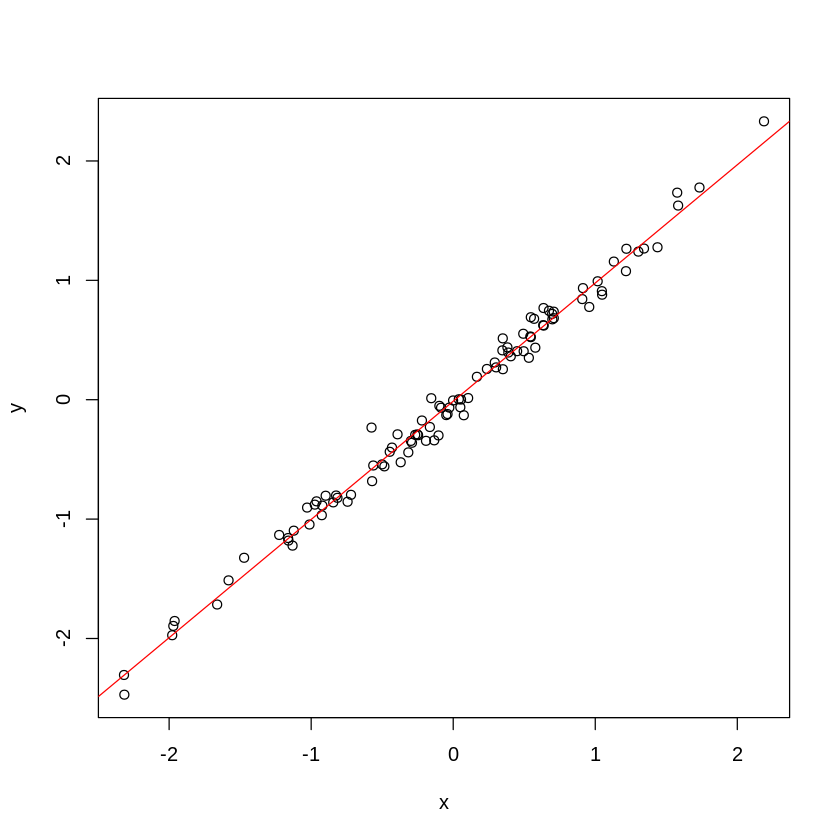

In [1]:
x = rnorm(100)
y = x + rnorm(100)/10
m = lm( y ~ x)
plot( y ~ x)
abline(m, col='red')

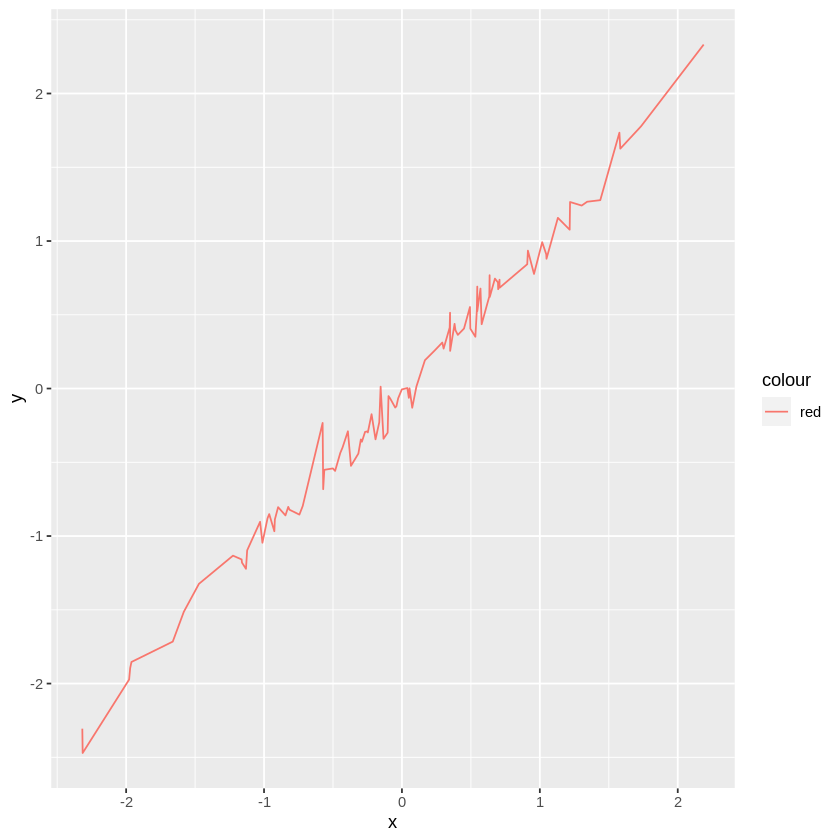

In [39]:
mydata = tibble(cbind(x,y))
ggplot(mydata, aes(x=x, y=y, col="red")) + geom_line()

## Looking for helps

In [49]:
?date

In [50]:
help(read_csv)

# Load data from JHU GitHub site

In [12]:
# load JHU covid19 data set with tidyverse read_csv
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1385,1398,1413,1420,1432,1442,1447,1585,1619,1624
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,4609,4639,4678,4722,4752,4781,4800,4978,5003,5021
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,617,618,618,618,620,622,626,801,809,809
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,562,564,566,574,576,578,581,610,612,617
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,1071,1082,1099,1109,1114,1121,1128,1464,1487,1504
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,545,548,550,551,552,558,558,580,583,585


# How to do pick rows, columns, and cells? 

In [13]:
# pick first row
tb[1,] 

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1385,1398,1413,1420,1432,1442,1447,1585,1619,1624


In [16]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID
<dbl>
84001001
84001003
84001005
84001007
84001009
84001011
84001013
84001015
84001017


In [19]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,"Autauga, Alabama, US",0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,"Baldwin, Alabama, US",0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,"Barbour, Alabama, US",0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,"Bibb, Alabama, US",0
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,"Blount, Alabama, US",0


In [22]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 251

[1] "There are  251  columns"


In [58]:
# view the first 5 rows in all data columns
tb[1:5 , 12:length(tb[1,])  ]

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1385,1398,1413,1420,1432,1442,1447,1585,1619,1624
0,0,0,0,0,0,0,0,0,0,⋯,4609,4639,4678,4722,4752,4781,4800,4978,5003,5021
0,0,0,0,0,0,0,0,0,0,⋯,617,618,618,618,620,622,626,801,809,809
0,0,0,0,0,0,0,0,0,0,⋯,562,564,566,574,576,578,581,610,612,617
0,0,0,0,0,0,0,0,0,0,⋯,1071,1082,1099,1109,1114,1121,1128,1464,1487,1504


## selection columns of daily cases

In [120]:
tb %>% select(12:length(tb[1,]))

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1385,1398,1413,1420,1432,1442,1447,1585,1619,1624
0,0,0,0,0,0,0,0,0,0,⋯,4609,4639,4678,4722,4752,4781,4800,4978,5003,5021
0,0,0,0,0,0,0,0,0,0,⋯,617,618,618,618,620,622,626,801,809,809
0,0,0,0,0,0,0,0,0,0,⋯,562,564,566,574,576,578,581,610,612,617
0,0,0,0,0,0,0,0,0,0,⋯,1071,1082,1099,1109,1114,1121,1128,1464,1487,1504
0,0,0,0,0,0,0,0,0,0,⋯,545,548,550,551,552,558,558,580,583,585
0,0,0,0,0,0,0,0,0,0,⋯,859,862,863,863,865,866,867,900,901,902
0,0,0,0,0,0,0,0,0,0,⋯,2602,2615,2652,2679,2728,2773,2790,3110,3165,3211
0,0,0,0,0,0,0,0,0,0,⋯,857,858,858,862,863,863,864,1097,1107,1106


## Convert daily cases into rows

In [121]:
# this is fast but awkward
tb1 <- tb %>% select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))
head(tb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [117]:
#this is very slow due to installation
install.packages('data.table')
library(data.table)
tb1b <- tb %>% select(12:length(tb[1,])) %>% transpose()
tb1b

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Add meaning columns names

In [124]:
names(tb1) = tb$Combined_Key
head(tb1[100:110,1:10])

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/30/20,44,174,39,42,37,13,53,94,295,15
5/1/20,42,175,42,42,39,14,65,93,290,15
5/2/20,45,181,43,42,40,14,92,98,294,15
5/3/20,48,187,45,43,40,14,105,105,300,16
5/4/20,53,188,45,42,40,16,114,105,302,16
5/5/20,53,189,47,43,40,18,120,114,304,17


# Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [51]:
date("8/9/2020")

[1] "8-09-20"

In [131]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20" "1/23/20" "1/24/20" "1/25/20" "1/26/20" "1/27/20" "1/28/20"
  [8] "1/29/20" "1/30/20" "1/31/20" "2/1/20"  "2/2/20"  "2/3/20"  "2/4/20" 
 [15] "2/5/20"  "2/6/20"  "2/7/20"  "2/8/20"  "2/9/20"  "2/10/20" "2/11/20"
 [22] "2/12/20" "2/13/20" "2/14/20" "2/15/20" "2/16/20" "2/17/20" "2/18/20"
 [29] "2/19/20" "2/20/20" "2/21/20" "2/22/20" "2/23/20" "2/24/20" "2/25/20"
 [36] "2/26/20" "2/27/20" "2/28/20" "2/29/20" "3/1/20"  "3/2/20"  "3/3/20" 
 [43] "3/4/20"  "3/5/20"  "3/6/20"  "3/7/20"  "3/8/20"  "3/9/20"  "3/10/20"
 [50] "3/11/20" "3/12/20" "3/13/20" "3/14/20" "3/15/20" "3/16/20" "3/17/20"
 [57] "3/18/20" "3/19/20" "3/20/20" "3/21/20" "3/22/20" "3/23/20" "3/24/20"
 [64] "3/25/20" "3/26/20" "3/27/20" "3/28/20" "3/29/20" "3/30/20" "3/31/20"
 [71] "4/1/20"  "4/2/20"  "4/3/20"  "4/4/20"  "4/5/20"  "4/6/20"  "4/7/20" 
 [78] "4/8/20"  "4/9/20"  "4/10/20" "4/11/20" "4/12/20" "4/13/20" "4/14/20"
 [85] "4/15/20" "4/16/20" "4/17/20" "4/18/20" "4/19/20" "4/20/20" "4/21/20"
 [92] "4/22/20" "4/23/20" "4/24/20" "4/25/20" "4/26/20" "4/27/20" "4/28/20"
 [99] "4/29/20" "4/30/20" "5/1/20"  "5/2/20"  "5/3/20"  "5/4/20"  "5/5/20" 
[106] "5/6/20"  "5/7/20"  "5/8/20"  "5/9/20"  "5/10/20" "5/11/20" "5/12/20"
[113] "5/13/20" "5/14/20" "5/15/20" "5/16/20" "5/17/20" "5/18/20" "5/19/20"
[120] "5/20/20" "5/21/20" "5/22/20" "5/23/20" "5/24/20" "5/25/20" "5/26/20"
[127] "5/27/20" "5/28/20" "5/29/20" "5/30/20" "5/31/20" "6/1/20"  "6/2/20" 
[134] "6/3/20"  "6/4/20"  "6/5/20"  "6/6/20"  "6/7/20"  "6/8/20"  "6/9/20" 
[141] "6/10/20" "6/11/20" "6/12/20" "6/13/20" "6/14/20" "6/15/20" "6/16/20"
[148] "6/17/20" "6/18/20" "6/19/20" "6/20/20" "6/21/20" "6/22/20" "6/23/20"
[155] "6/24/20" "6/25/20" "6/26/20" "6/27/20" "6/28/20" "6/29/20" "6/30/20"
[162] "7/1/20"  "7/2/20"  "7/3/20"  "7/4/20"  "7/5/20"  "7/6/20"  "7/7/20" 
[169] "7/8/20"  "7/9/20"  "7/10/20" "7/11/20" "7/12/20" "7/13/20" "7/14/20"
[176] "7/15/20" "7/16/20" "7/17/20" "7/18/20" "7/19/20" "7/20/20" "7/21/20"
[183] "7/22/20" "7/23/20" "7/24/20" "7/25/20" "7/26/20" "7/27/20" "7/28/20"
[190] "7/29/20" "7/30/20" "7/31/20" "8/1/20"  "8/2/20"  "8/3/20"  "8/4/20" 
[197] "8/5/20"  "8/6/20"  "8/7/20"  "8/8/20"  "8/9/20"  "8/10/20" "8/11/20"
[204] "8/12/20" "8/13/20" "8/14/20" "8/15/20" "8/16/20" "8/17/20" "8/18/20"
[211] "8/19/20" "8/20/20" "8/21/20" "8/22/20" "8/23/20" "8/24/20" "8/25/20"
[218] "8/26/20" "8/27/20" "8/28/20" "8/29/20" "8/30/20" "8/31/20" "9/1/20" 
[225] "9/2/20"  "9/3/20"  "9/4/20"  "9/5/20"  "9/6/20"  "9/7/20"  "9/8/20" 
[232] "9/9/20"  "9/10/20" "9/11/20" "9/12/20" "9/13/20" "9/14/20" "9/15/20"
[239] "9/16/20" "9/17/20"

In [133]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [136]:
tb1$dates = mdy(current_dates)
head(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-22
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-23
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-24
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-25
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-26
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-27


## Select a time window

In [142]:
tb1 %>% filter( dates > mdy("5/1/2020"), dates < mdy("5/31/20")) %>% head()

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
5/2/20,45,181,43,42,40,14,92,98,294,15,⋯,0,16,3,18,97,8,0,8,0,2020-05-02
5/3/20,48,187,45,43,40,14,105,105,300,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-03
5/4/20,53,188,45,42,40,16,114,105,302,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-04
5/5/20,53,189,47,43,40,18,120,114,304,17,⋯,0,16,3,18,98,8,0,8,0,2020-05-05
5/6/20,58,196,47,43,42,18,130,114,306,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-06
5/7/20,61,205,51,44,44,18,155,120,308,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-07


In [145]:
start = mdy("8/1/20")
start + ddays(14)

[1] "2020-08-15"

In [147]:
tb1 %>% filter( dates >= start, dates <  start + ddays(14)) %>% select(1:5)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8/1/20,988,3095,554,360,704
8/2/20,1010,3175,562,364,722
8/3/20,1024,3210,563,374,736
8/4/20,1030,3263,563,381,741
8/5/20,1030,3322,564,384,745
8/6/20,1050,3380,565,413,759
8/7/20,1065,3443,569,416,774
8/8/20,1086,3502,573,426,788
8/9/20,1169,3544,575,438,800


# Plot a time window

In [151]:
tb_sub <- tb1 %>% filter( dates >= start, dates <  start + ddays(14)) 

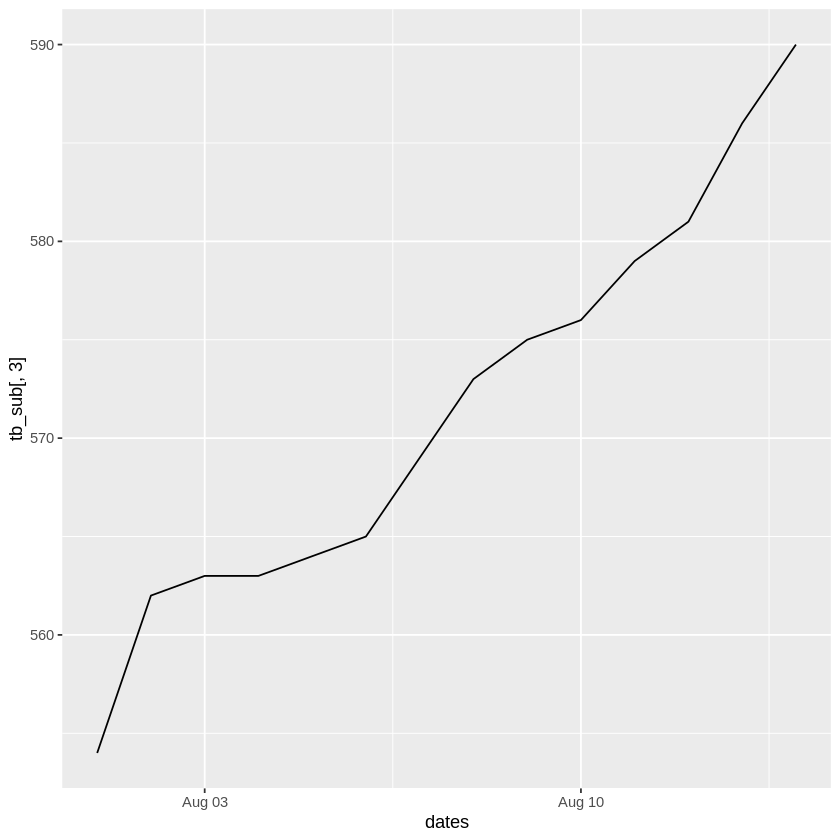

In [160]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_line() 